## Integrating Consecutive Reactions

Note: I stole most of this math from a my tutorial on integration. (09-T21-Integrating_Simple_Rate_Equations.pdf)

### The System of Reactions

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

...we can identify the rate of formation of each species by writing their rate laws as differential equations...

$$\begin{align}
\dfrac{d \left[ \text{A} \right]_t}{dt} &= -k_1 \left[ \text{A} \right]_t \\
\dfrac{d \left[ \text{I} \right]_t}{dt} &= k_1 \left[ \text{A} \right]_t - k_2 \left[ \text{I} \right]_t \\
\dfrac{d \left[ \text{P} \right]_t}{dt} &= k_1 \left[ \text{A} \right]_t + k_2 \left[ \text{I} \right]_t 
\end{align}$$

### Integrating for [A]

We have already done this above. the integrated rate law for $[A]_t$ is known...

$$\left[ \text{A} \right]_t = \left[ \text{A} \right]_0 e^{-k_1 t}$$

### Integrating for [I]

Substitute the integrated rate law for $[A]$ into the rate law for $[I]$ above...

$$\dfrac{d \left[ \text{I} \right]_t}{dt} = k_1 \left[ \text{A} \right]_0 e^{-k_1 t} - k_2 \left[ \text{I} \right]_t$$

As before we can set a value, $x$, that describes the progress of the reaction. We can state that $[I]_t = x$ and set up a differential equation like so...

$$ \frac{d}{d t}{x} = A_{0} k_{1} e^{- k_{1} t} - k_{2} x$$

My integration skills are very rusty. Do I use integration by parts or integration by substitution? rather than relearn calculus I truyne to the symbolic math tools of sympy. Consider the code below.

In [2]:
import sympy as sym

t = sym.symbols('t')     # create t as a 'symbol', not a variable
k1 = sym.symbols('k1')     # create k as a 'symbol'
k2 = sym.symbols('k2')     # create k as a 'symbol'
At = sym.symbols('A_t')  # create At as a 'symbol'
A0 = sym.symbols('A0')   # create A0 as a 'symbol'
It = sym.symbols('I_t')   # create A0 as a 'symbol'

xt = sym.Function('x_t')    # create x as a 'function', not a variable

lhs = sym.Derivative(It, t) # Using Derivative function to get differential of A(t) w.r.t. t
                            # could not used At.diff(t) because At is not a function 
rhs = k1*(A0)*sym.exp(-k1*t)-k2*It

diffeq = sym.Eq(lhs, rhs)   # create a sympy equation
print("The initial differential equation is...")
display(diffeq)             # display that equation

diffeq = diffeq.subs({It: xt(t)})

print("After substituting the differential equation is...")
display(diffeq)             # display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})     # Solve the differential equation. 
                                            # Initial condition is x(t) = 0 when t = 0
display(res)

print("Collecting some terms and substiting for x gives...")
simplified = sym.collect(res.rhs,(A0*k1/(k1-k2)))
I = sym.Eq(It,simplified)
display(I)


The initial differential equation is...


Eq(Derivative(I_t, t), A0*k1*exp(-k1*t) - I_t*k2)

After substituting the differential equation is...


Eq(Derivative(x_t(t), t), A0*k1*exp(-k1*t) - k2*x_t(t))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), A0*k1*exp(-k2*t)/(k1 - k2) - A0*k1*exp(-k1*t)/(k1 - k2))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Now we have the term...

$$ x =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

...and, knowing that $[I]_t = x$, we can now say...

$$ \left[I \right]_t =A_{0} \frac{ k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)$$

### Integrating for [P]

We dont have to integrate for this last term. We can say that the total amount of material is equal to $[A]_0$. Recall the reaction scheme...

For reactions of the form...

$$\text{A} \overset{k_1}{\longrightarrow} \text{I} + \text{P}$$
$$\text{I} \overset{k_2}{\longrightarrow} \text{P}$$

... and write a mass balance equation...

$$\begin{align}
2 [A]_0 &= 2*[A]_t+[I]_t+[P]_t \\
[P]_t &= 2 [A]_0 - \left(2*[A]_t+[I]_t\right) 
\end{align}$$


For the fun of it, lets let sympy do all the work in the code below...

In [3]:
Pt = sym.symbols('P_t')   # create Pt as a 'symbol'

A = sym.Eq(At,A0*sym.exp(-k1*t))
display(A,I)

rhs = 2*A0 - 2*A.rhs - I.rhs
display(rhs)

rhs = sym.collect(rhs,A0)
display(rhs)

P = sym.Eq(Pt,rhs)
display(P)


Eq(A_t, A0*exp(-k1*t))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

-A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2*A0 - 2*A0*exp(-k1*t)

A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))

Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

So the amount of product over time is expressed as...

$$P_{t} = A_{0} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$

In [4]:
display(A,I,P)

Eq(A_t, A0*exp(-k1*t))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

exp(-0.002*t)

-1.11172873818788*exp(-0.002*t) + 1.11172873818788*exp(-0.000201*t)

2 - 0.888271261812118*exp(-0.002*t) - 1.11172873818788*exp(-0.000201*t)

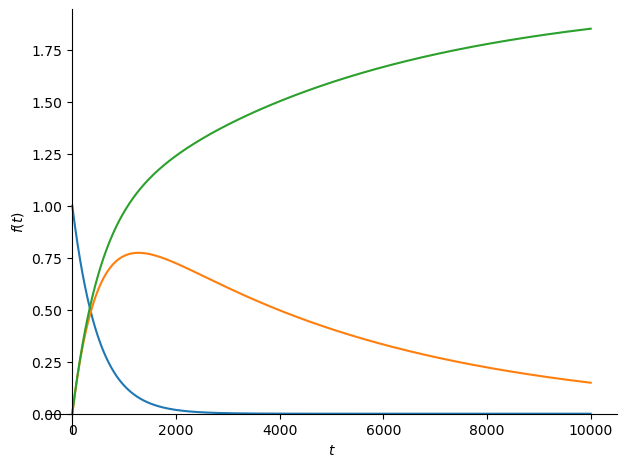

In [5]:
import matplotlib.pyplot as plt

k1_rate = 2e-3
k2_rate = 2.01e-4
A0_conc = 1

t_range = [t,0,10000]

eq1 = A.rhs
eq1 = eq1.subs({k1:k1_rate, A0:A0_conc})

eq2 = I.rhs
eq2 = eq2.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})

eq3 = P.rhs
eq3 = eq3.subs({k1:k1_rate, k2:k2_rate, A0:A0_conc})

display(eq1,eq2,eq3)


plt.rcdefaults()

p = sym.plot(eq1,eq2,eq3,t_range, show=False)
p.show()

## Absorbance

the authors followed the reaction by absorbance. The amount of $A$ is decreasing and the amount of $C$ is increasing. If the final aborbance is different than the initial (e.q. A and C have different extinction coefficients) then we should be able to get kinetic parameters from an equation that describes the change in absorbance vs. time. 

The total $Abs$ will be $Abs_A(t) + Abs_I(t) + Abs_P(t)$

And we can say that...

$$Abs(t) = \epsilon_A\cdot A_t + \epsilon_I\cdot I_t + \epsilon_P\cdot P_t$$

$$Abs(t) = \epsilon_A\cdot A_{0} e^{- k t} +
 \epsilon_I\cdot A_{0} \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \epsilon_P\cdot A_{0} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$


When we begin, the initial absorbance is due to $[A]_0$ and so we can say that $Abs_0 = \epsilon_A\cdot A_{0}$ and so if...

$$A_{0} = \frac{Abs_0}{\epsilon_A}$$

...then we can say that

$$Abs(t) = \epsilon_A\cdot \frac{Abs_0}{\epsilon_A} e^{- k t} +
 \epsilon_I\cdot \frac{Abs_0}{\epsilon_A} \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \epsilon_P\cdot \frac{Abs_0}{\epsilon_A} \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$


and after we simplify we get the same equation as the authors present in their paper (eq. 2). It is a useful exercise to check the math in any paper. Printing errors are common, especially in typeset equations and figures that are often reinterpretted in the printing process (especially a risk in older papers.)

$$Abs(t) = {Abs_0} e^{- k t} +
 \frac{\epsilon_I}{\epsilon_A}Abs_0 \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right) + 
 \frac{\epsilon_P}{\epsilon_A}  Abs_0 \left( 2\left(1 -  e^{- k_{1} t}\right) - \frac{k_{1} }{k_{1} - k_{2}}\left(e^{- k_{2} t} - e^{- k_{1} t}\right)\right)$$

Now let us do all of that with *Python*


In [6]:
display(A,I,P)

At_ = A.rhs      # expressions for concentrations
It_ = I.rhs
Pt_ = P.rhs

e_A = sym.symbols(r'\epsilon_A')   # extinction coefficients
e_I = sym.symbols(r'\epsilon_I') 
e_P = sym.symbols(r'\epsilon_P') 

Abs_A = sym.symbols(r'Abs_A')   # variables for absotrbances
Abs_I = sym.symbols(r'Abs_I')
Abs_P = sym.symbols(r'Abs_P')
Abs_0 = sym.symbols('Abs_0')

Total = e_A*At_ + e_I*It_ + e_P*Pt_           # total absorbance
Total = Total.subs(A0, Abs_0/e_A)
display(Total)

display(Total.subs(e_I/e_A, At))


Eq(A_t, A0*exp(-k1*t))

Eq(I_t, A0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2))

Eq(P_t, A0*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t)))

Abs_0*exp(-k1*t) + Abs_0*\epsilon_I*k1*(exp(-k2*t) - exp(-k1*t))/(\epsilon_A*(k1 - k2)) + Abs_0*\epsilon_P*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))/\epsilon_A

A_t*Abs_0*k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + Abs_0*exp(-k1*t) + Abs_0*\epsilon_P*(-k1*(exp(-k2*t) - exp(-k1*t))/(k1 - k2) + 2 - 2*exp(-k1*t))/\epsilon_A

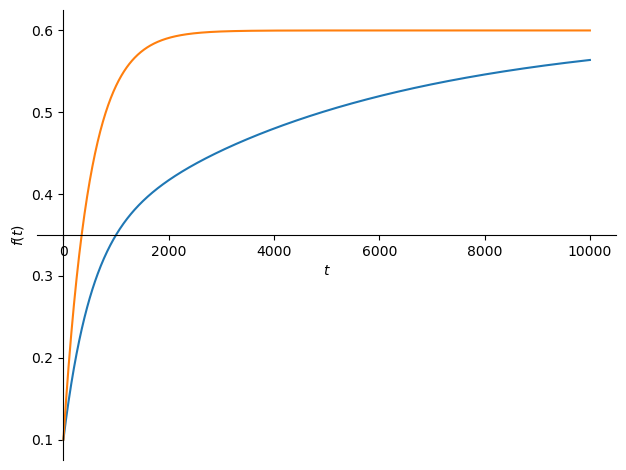

In [7]:
k1_rate = 2e-3
k2_rate = 2.0e-4
Abs0_ = 0.1

t_range = [t,0,10000]

eq = Total
eq = eq.subs({k1:k1_rate, 
                k2:k2_rate, 
                Abs_0:Abs0_,
                e_A: 1,
                e_I: 0.6,
                e_P: 3})


#display(eq)


plt.rcdefaults()

p = sym.plot(eq,t_range, show=False)


k1_rate = 2e-3
k2_rate = 2.01e1
Abs0_ = 0.1

t_range = [t,0,10000]

eq = Total
eq = eq.subs({k1:k1_rate, 
                k2:k2_rate, 
                Abs_0:Abs0_,
                e_A: 1,
                e_I: 0.6,
                e_P: 3})




q = sym.plot(eq,t_range, show=False)


p.extend(q)

p.show()

## Using Numeric Method

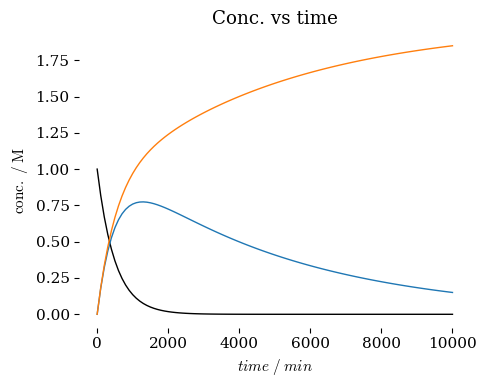

In [12]:
### from StealThisCode/4_SciPy/K05_NumericIntegration_SystemEq.ipynb

#######################
### import packages 
#######################

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

############################################
### Create a function that describes the 
### system of differential equations. 
############################################

def rates(t, c, k_1, k_2):  

    A = c[0]; I = c[1]; P = c[2]           ### assign initial conc. from input list c

    dA_dt = -k_1 * c[0]    ### rates of each reaction step with give concentration in list c
    dI_dt = k_1 * c[0]  - k_2 * c[1] 
    dP_dt = k_1 * c[0] + k_2 * c[1] 

    return [dA_dt, dI_dt, dP_dt]


############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1
      
time_end = 10000   ### The end time
n_points = 100   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

dt = time_end / n_points           ### time step, delta t
t_line = np.arange(0, time_end+dt, dt) ### time vector (list of time points)
num = len(t_line)


#########################################
### Integrate the system of differential equations      
#########################################

initial = [A0_conc, 0, 0]      ### Set list of initial values (A, I, P)

int = solve_ivp(rates,                ### the function being integrated. 
                [0, time_end],        ### start and endpoint of integration
                initial,              ### initial values
                method = "Radau",     ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                t_eval = t_line,      ### time points at which to calculate values
#                first_step = 1e-5,    ### take a very small first step. the initial rate is much faster than the average slope.
                args = [k_1, k_2]  ### values to send to function after t and c
                )

#########################################
### Extract the results from the returned data object      
#########################################

time = int.t        ### solve_inp() returns an array for time indexed as 't'
yarray = int.y      ### Also retruns and array of calculated y values.
                    ###  if more than one value returned from function we will
                    ###  get a array of arrays for each value

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = yarray[0] 
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[1]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C1',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

x = time      
y = yarray[2]
ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C2',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
#########################################
### Add more style
#########################################
        
ax.set(ylabel=r"$\rm conc.\;/\;M $", 
        xlabel=r"$time\; /\; min$",
        title = "Conc. vs time",
        xlim=[None, None],      
        ylim=[None, None])


fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig("plot.pdf")    # use this to save the figure in PDF format
plt.show()                 # output the combined four plots



### Total Absorbance

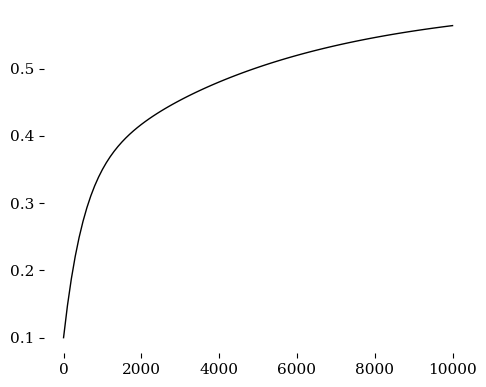

In [17]:
k1_rate = 2e-3
k2_rate = 2.0e-4
Abs0_ = 0.1

e_A_ = 1
e_I_ = 0.6
e_P_ = 3

t_range = [t,0,10000]

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = Abs0_*(yarray[0] + e_I_/e_A_*yarray[1] + e_P_/e_A_*yarray[2])

ax.plot(x, y, 
        linestyle = '-',            ### use a line between points
 #       linewidth='0.5',            ### make the line thin
        color = 'C0',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )


## Make Data

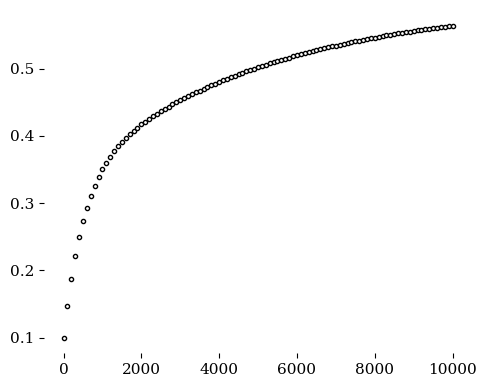

In [22]:
############################################
### Parameters and experimental conditions
############################################

k_1 = 2e-3          ### Values for kinetic parameters
k_2 = 2e-4
A0_conc = 1

Abs0_ = 0.1

e_A_ = 1
e_I_ = 0.6
e_P_ = 3


      
time_end = 10000   ### The end time
n_points = 100   ### number of points - increase if needed

#########################################
### Create series of time points      
#########################################

dt = time_end / n_points           ### time step, delta t
t_line = np.arange(0, time_end+dt, dt) ### time vector (list of time points)
num = len(t_line)


#########################################
### Integrate the system of differential equations      
#########################################

initial = [A0_conc, 0, 0]      ### Set list of initial values (A, I, P)

int = solve_ivp(rates,                ### the function being integrated. 
                [0, time_end],        ### start and endpoint of integration
                initial,              ### initial values
                method = "Radau",     ### 'RK45', 'RK23', 'LSODA', 'DOP853', 'Radau', 'BDF'
                t_eval = t_line,      ### time points at which to calculate values
#                first_step = 1e-5,    ### take a very small first step. the initial rate is much faster than the average slope.
                args = [k_1, k_2]  ### values to send to function after t and c
                )

#########################################
### Extract the results from the returned data object      
#########################################

time = int.t        ### solve_inp() returns an array for time indexed as 't'
yarray = int.y      ### Also retruns and array of calculated y values.
                    ###  if more than one value returned from function we will
                    ###  get a array of arrays for each value

##################################################################################
### Plot the results
##################################################################################

plt.rcdefaults()                    ### resets the plot defaults so we always start in the same place
plt.style.use("../styles/tufte.mplstyle")     ### Then add a fancy style sheet   

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  

#########################################
### Plot the line using the x_fit, y_fit points
#########################################
x = time      
y = Abs0_*(yarray[0] + e_I_/e_A_*yarray[1] + e_P_/e_A_*yarray[2])

ax.plot(x, y, 
        linestyle = None,            ### use a line between points
        marker = ".",
        linewidth=0,            ### make the line thin
        color = 'C0',            ### the line is black
        markerfacecolor = 'white',
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )

